In [1]:
# 필요한 라이브러리 import 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 1.'과제2.ipynb' 파일의 train, val, test 데이터 셋 기준으로 분류하여 데이터를 준비하세요

### 데이터 준비

In [2]:
# google drive mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# data 읽어오기 , 경로복사 붙여넣기
data = '/content/drive/MyDrive/data/result.txt'
df = pd.read_csv(data, sep=',' )
df.columns = ["y", 'x1', 'x2']
df

,y,x1,x2
0,0,380,3.61
1,1,660,3.67
2,1,800,4.00
3,1,640,3.19
4,0,520,2.93
...,...,...,...
395,1,620,4.00
396,1,560,3.04
397,0,460,2.63
398,1,700,3.65


In [4]:
df['y'].value_counts()

# 1은 287개, 0은 113개

1    287
0    113
Name: y, dtype: int64

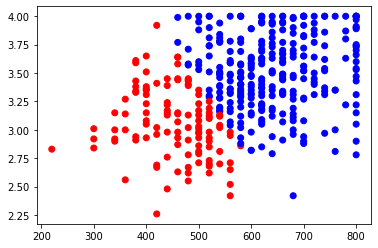

In [5]:
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue'}
ax.scatter(df['x1'], df['x2'], c=df['y'].map(colors))
plt.show()

In [6]:
n = 400
ts = 80
vs =80
print(n,ts,vs)

400 80 80


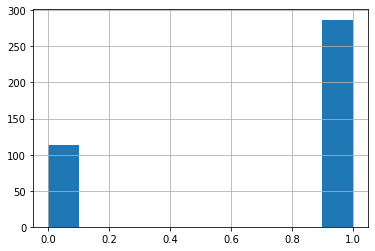

In [7]:
df['y'].hist()

In [48]:
# train, test, validation 데이터로 분리하기
# 400개의 데이터를 ts, vs 사이즈 80개씩 분리하였다.
train_df, test_df = train_test_split(df, test_size = ts, random_state = 123)
train_df, val_df = train_test_split(train_df, test_size = vs, random_state = 123)
print(len(train_df), len(test_df), len(val_df))

240 80 80


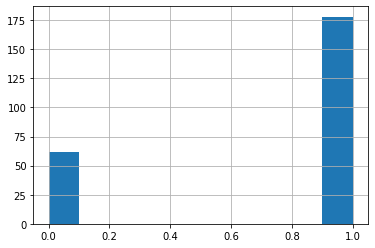

In [45]:
train_df['y'].hist()

In [42]:
train_df[:2]

,y,x1,x2
354,1,540,3.78
225,1,720,3.50


# 2.모델링은 주어진 model.png 파일의 모습과 같이 하세요.

## 모델링

In [49]:
# 입력데이터로 정리
y_train = train_df.pop('y')
x_train = train_df
y_test = test_df.pop('y')
x_test = test_df
y_val = val_df.pop('y')
x_val = val_df
x_train
x_val

,x1,x2
170,400,3.51
366,460,2.93
89,660,4.00
49,400,3.35
63,680,3.85
...,...,...
185,800,3.60
228,480,3.43
126,600,3.54
365,480,2.78


In [12]:
# input_shape 입력변수의 개수 확인
train_features = np.array(train_df)
train_features.shape[-1]

2

In [28]:
# 다층의 layer를 쌓아서 모델링, 훈련에 사용할 옵티마이저(optimizer)와 손실 함수를 선택 

model = keras.models.Sequential()
model.add(keras.layers.Dense(8, activation='relu', input_shape=(train_features.shape[-1],)))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',  # 0또는 1로 구분해주는 loss를 정의했다.
              metrics=['accuracy'])   # 측정은 accuracy로 하겠다.

In [29]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 8)                 24        
                                                                 
 dense_22 (Dense)            (None, 8)                 72        
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


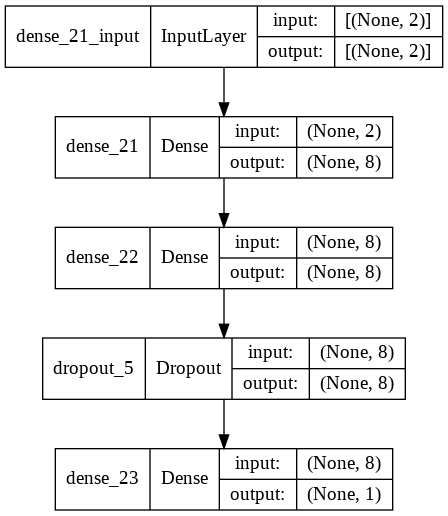

In [30]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

## Training

In [64]:
# 그래서 이제 트레이닝 할건데, 트레이닝을 할땐 모델을 어떻게 저장할건지
# 기본 워킹디렉토리에 model.hdf5로 저장됨

# 모델 저장 설정
save_weights = tf.keras.callbacks.ModelCheckpoint("model.hdf5",
                                                  monitor='val_accuracy',
                                                  verbose=1,
                                                  save_best_only=True,
                                                  mode="max",
                                                  save_freq="epoch",
                                                  save_weights_only=True)

In [65]:
# 모델 학습 및 필요 데이터 저장 
history = model.fit(x_train, y_train, validation_data=(x_val, y_val) ,
                    epochs=20, # 전체프로세스를 몇번 반복할건지
                               # 데이터의 수와 파라미터 수를 고려하여 에포크 값을 20으로 정하였다.
                    batch_size=100,  # 한 epochs를 돌때 데이터를 몇개씩 입력시킬건지
                                     # 배치값에 따라 추론의 정확도에 영향을 미친다
                                     
                    callbacks=[save_weights])

Epoch 1/20
1/3 [=========>....................] - ETA: 0s - loss: 6.5568 - accuracy: 0.6700
Epoch 00001: val_accuracy improved from -inf to 0.67500, saving model to model.hdf5
3/3 [==============================] - 0s 40ms/step - loss: 6.5866 - accuracy: 0.6917 - val_loss: 4.4758 - val_accuracy: 0.6750
Epoch 2/20
1/3 [=========>....................] - ETA: 0s - loss: 7.1026 - accuracy: 0.6600
Epoch 00002: val_accuracy did not improve from 0.67500
3/3 [==============================] - 0s 14ms/step - loss: 5.9781 - accuracy: 0.6625 - val_loss: 4.3868 - val_accuracy: 0.6750
Epoch 3/20
1/3 [=========>....................] - ETA: 0s - loss: 7.0434 - accuracy: 0.6400
Epoch 00003: val_accuracy did not improve from 0.67500
3/3 [==============================] - 0s 14ms/step - loss: 6.7249 - accuracy: 0.6458 - val_loss: 4.2777 - val_accuracy: 0.6750
Epoch 4/20
1/3 [=========>....................] - ETA: 0s - loss: 6.8327 - accuracy: 0.7200
Epoch 00004: val_accuracy did not improve from 0.67500

## 평가

In [68]:
# 이제 training한것을 가지고 이 모델이 잘적합 되었는지
# model.evaluate()의 함수를 이용하여 평가하게 됨

# 훈련된 이미지 분류기는 이 데이터셋에서 거의 68.7%의 정확도를 달성
loss, accuracy = model.evaluate(x_test,  y_test, verbose=2)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

3/3 - 0s - loss: 2.4690 - accuracy: 0.6875 - 19ms/epoch - 6ms/step
Loss:  2.468975305557251
Accuracy:  0.6875


In [69]:
# 학습간 저장된 데이터 확인  
history_dict = history.history
history_dict.keys()

# loss, accuracy는 트레닝 데이터에서 나온 데이터 값이고
# 'val_loss', 'val_accuracy'는 벨류데이션 데이터를 가지고 에포크마다 평가를 한 값이다.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

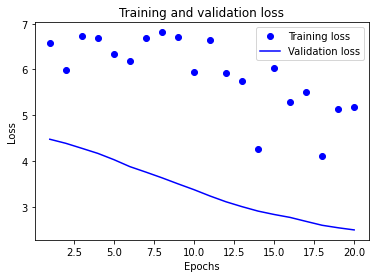

In [70]:
# 손실과 정확도 도식 
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 20번의 에포크를 수행하면서 단계마다 트레이닝로스가 줄어듬
# 오히려 벨류데이션 로스가 더 낮음, 벨류데이션은 올라가는 순간이 존재함

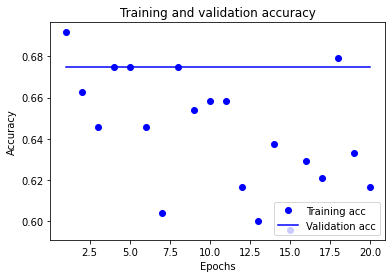

In [71]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

# 트레이닝 아큐레이시가 점점 증가, 벨류데이션 아큐레이시는 어느순간 일정함 하지만
# 일정하다가 곧 떨어지게 된다. 

# 이것을 계속 트레이닝 시키면 트레이닝 데이터에 적합은 되지만
# 일반적인 데이터에 적절하게 적용이 되지 않는 경우가 생긴다. 
# 그런 경우를 과적합(오버피팅)이라고 한다. 그래서 벨류데이션 데이터를 가지고
# 오버피팅이 되지않는 그 순간의 값을 사용하게 된다.

## 배포

In [230]:
# 이제 학습한 내용을 가지고 배포를 해야한다.

new_x = [[-161.3,33.6], [-161.4, 33.6], [110,1], [110, 33.6]]  # 이것은 임의의 데이터임 
                                # 임의의 데이터를 넣고 시도해볼수있음


In [231]:
# 저장된 모델 호출 
model.load_weights('model.hdf5')

y_pred = model.predict(new_x)
print(np.round(y_pred).astype(int))

[[0]
 [1]
 [1]
 [0]]


# 3.모델 평가결과 정확도 향상을 위해 추가적으로 노력해야할 사항은 어떤 것이 있는지 기술하세요.

10주차 실습때 했던 데이터에서는 2만개의 데이터를 ts, vs로 4000개씩 분리하여 적지 않은 데이터를 통해 모델링을 한 결과 loss는 상당히 낮고 accuracy값은 상당히 높게 측정이 되었다. 하지만 이번 과제에서는 400개의 데이터를 ts, vs로 80개씩 분리하여 모델링을 한 결과 105개의 파라미터가 나왔고, 이것을 추정하기 위해서는 그만큼 많은 데이터가 필요하다. 적은 데이터로 진행을 했기 때문에 loss는 높게, accuracy는 0.6875로 높지않은 정확성을 보이고 있다. 따라서 정확도 향상을 위해서는 보다 더 많은 데이터를 추가해야 한다. 

위의 그래프를 보면 validation loss는 매 epoch마다 계속 줄어드는것이 아니고, validation acc또한 계속해서 증가하는것이 아니라 감소하는 부분이 생긴다. 따라서 과적합이 되지 않는 순간의 값을 사용해야 하므로 정확도 향상을 위해서는 무작정 높은 epoch값으로 진행하는거 보다는 추정하고자 하는 파라미터의 수에 따라 적절한 epoch와 batch_size값을 정해줘야 한다.

데이터의 각 가중치를 조절한다면 모델의 정확도를 향상시킬 수 있다. 이때 정답과 추론 값의 차이를 최소화시키기 위해 가중치를 업데이트 하는 방법인 경사하강법을 이용할 수 있다.